# Copia: quickstart

In [1]:
import pandas as pd

Load data:

In [2]:
df = pd.read_csv('datasets/dum.csv', sep=';', header=None)
df.columns = 'work', 'signature'
df.head()

,work,signature
0,Aiol (1),"Leiden, UB, BPL 1049; Brussel, KB, IV 816"
1,Aiol (2),"Breda, Arch. Begijnhof, z.s."
2,Alexanders geesten,"München, Bayerische Staatsbibliotheek, Cod. ge..."
3,Alexanders geesten,"Gent, UB, 2749,6"
4,Alexanders geesten,"Leiden, UB, Ltk. 1196"


Convert to abundance data:

In [3]:
from copia.utils import to_abundance
works = df['work']
abundance = to_abundance(works)
print(abundance)

(1, 1, 5, 2, 1, 2, 1, 1, 2, 2, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 7, 1, 1, 3, 1, 10, 1, 3, 2, 10, 4, 2, 1, 3, 6, 5, 2, 5, 2, 5, 1, 1, 1, 1, 1, 2, 17, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)


Apply chao1:

In [4]:
from copia.richness import richness
print('Emprirical:', richness(abundance))
print('chao1:', richness(abundance, method='chao1'))
print('Egghe & Proot:', richness(abundance, method='egghe_proot'))
print('Jackknife:', richness(abundance, method='jackknife'))

Emprirical: 75
chao1: 152.41824044219254
Egghe & Proot: 170.30024512537264
Jackknife: 177.0


In [5]:
print(richness(abundance, method='jackknife', return_order=True))
print(richness(abundance, method='jackknife', return_order=True,return_ci=True))
print(richness(abundance, method='jackknife', return_ci=True, conf=.89))
print(richness(abundance, method='jackknife', return_order=False,
               return_ci=True, conf=.89))

{'richness': 177.0, 'order': 3}
{'richness': 177.0, 'order': 3, 'lci': 127.80529442066658, 'uci': 226.1947055793334}
{'richness': 177.0, 'lci': 127.80529442066658, 'uci': 226.1947055793334}
{'richness': 177.0, 'lci': 127.80529442066658, 'uci': 226.1947055793334}


In [6]:
print(richness(abundance, method='minsample'))
print(richness(abundance, method='minsample', solver='grid'))
print(richness(abundance, method='minsample', solver='fsolve'))
print(richness(abundance, method='minsample', solver='grid', tolerance=1e-10))

2047.7560477560478
2047.7560477560478
2047.7544528130888
2047.7560477560478


/Users/mikekestemont/GitRepos/copia/copia/richness.py:318: UserWarning: Tolerance criterion not met: 0.005726762492940907 > 1e-10
  warnings.warn(f'Tolerance criterion not met: {diff_intersect} > {tolerance}')


In [7]:

#sb.distplot(estimate['bootstrap'])
#plt.axvline(estimate['richness'], color='red');

In [8]:
#estimate = richness(abundance, method='minsample', solver='fsolve', CI=True)
#sb.distplot(estimate['bootstrap'])
#plt.axvline(estimate['richness'], color='red');

In [9]:
#estimate = richness(abundance, method='egghe_proot', CI=True)
#sb.distplot(estimate['bootstrap'])
#plt.axvline(estimate['richness'], color='red');

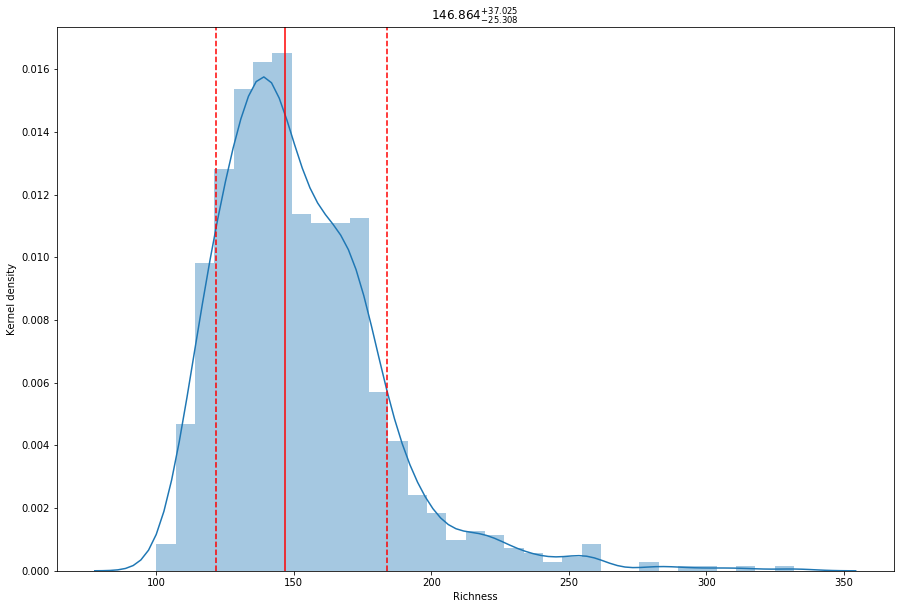

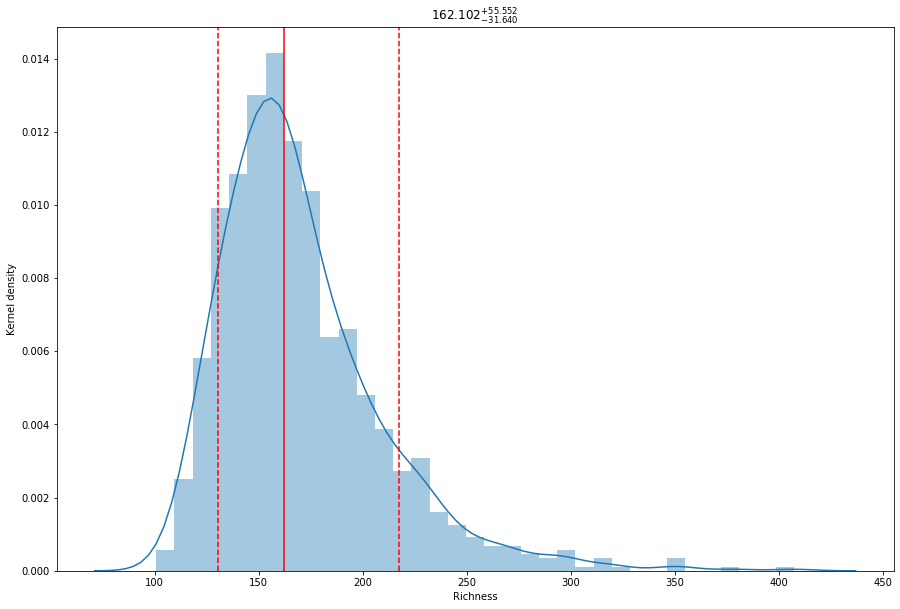

In [11]:
from copia.plot import autoplot as plot
estimate = richness(abundance, method='chao1', CI=True)
plot(estimate)
estimate = richness(abundance, method='egghe_proot', CI=True)
plot(estimate)